## Gathering Data
The data was taken from Yahoo Finance to get stocks data for Google for 10 years.
Google: https://finance.yahoo.com/quote/GOOG/history?period1=1249106400&period2=1535695200&interval=1d&filter=history&frequency=1d
S&P 500: https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/stock"

 AMZN.csv   NFLX.csv  'Stock Prediction.ipynb'
 GOOG.csv   SP.csv     Untitled0.ipynb


In [0]:
import numpy as np
import pandas as pd

In [0]:
# Read GOOG data
dfgoog = pd.read_csv("/content/drive/My Drive/stock/GOOG.csv", 
                      index_col="Date",
                      parse_dates=True,
                      na_values=['nan'])

###  Check the data set

In [5]:
dfgoog.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2009-08-03  222.920120  225.483444  222.373672  224.643906  224.643906   
2009-08-04  223.233078  225.533127  222.766129  225.399002  225.399002   
2009-08-05  226.526657  226.978729  222.492905  224.112366  224.112366   
2009-08-06  225.682159  225.970276  222.815796  223.724884  223.724884   
2009-08-07  226.362732  228.225616  226.024933  227.073105  227.073105   

             Volume  
Date                 
2009-08-03  5214200  
2009-08-04  4810600  
2009-08-05  4714300  
2009-08-06  4249200  
2009-08-07  5119100

In [6]:
dfgoog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2288 entries, 2009-08-03 to 2018-08-31
Data columns (total 6 columns):
Open         2288 non-null float64
High         2288 non-null float64
Low          2288 non-null float64
Close        2288 non-null float64
Adj Close    2288 non-null float64
Volume       2288 non-null int64
dtypes: float64(5), int64(1)
memory usage: 125.1 KB


## Data Exploration
- Open
- High
- Low
- Close
- Adj Close
- Volume

In [0]:
import matplotlib.pylab as plt
%matplotlib inline

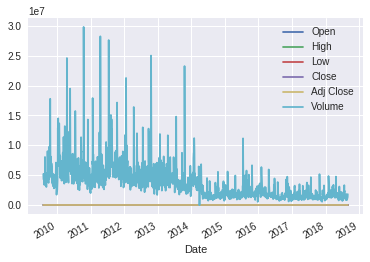

In [12]:
dfgoog.plot()
plt.show()

### Check the distibutions of the data columns to see wheter a normal distribution or not.

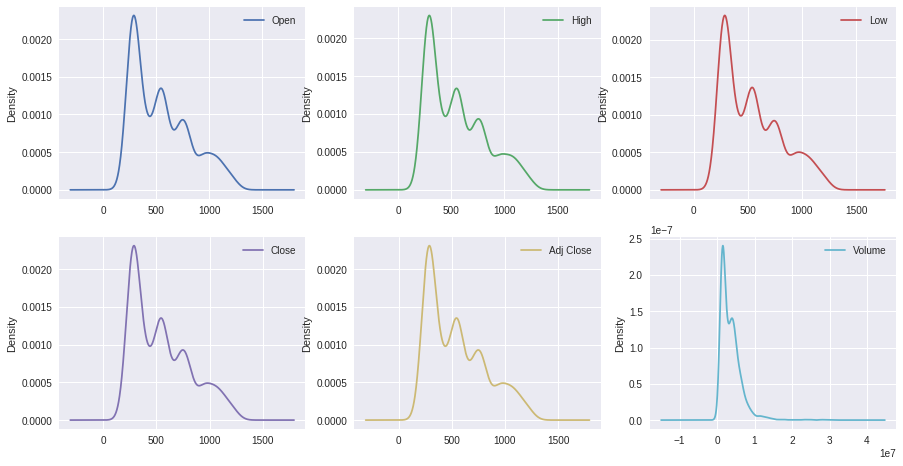

In [8]:
dfgoog.plot(kind='density', subplots=True, layout=(3,3), sharex=False,figsize=(15,12))
plt.show()

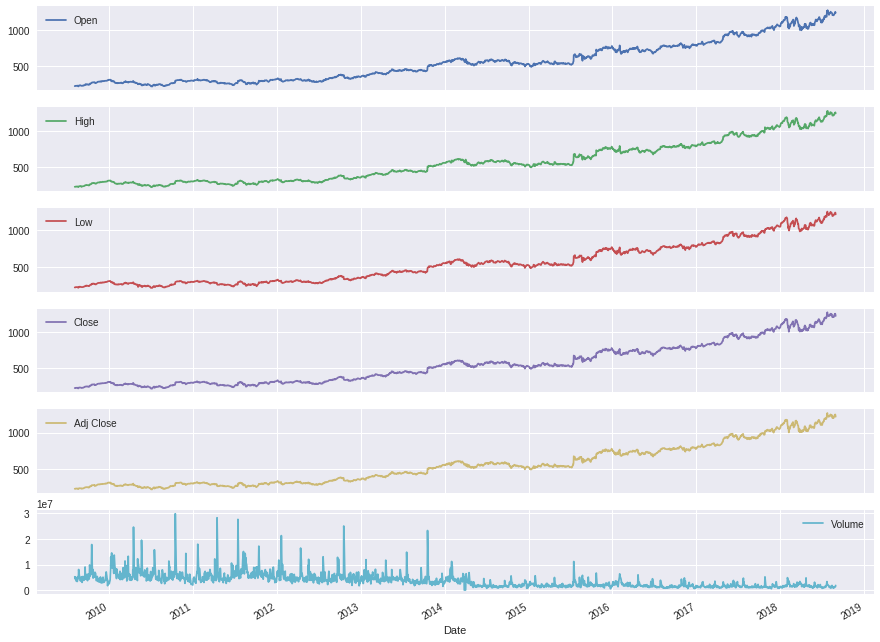

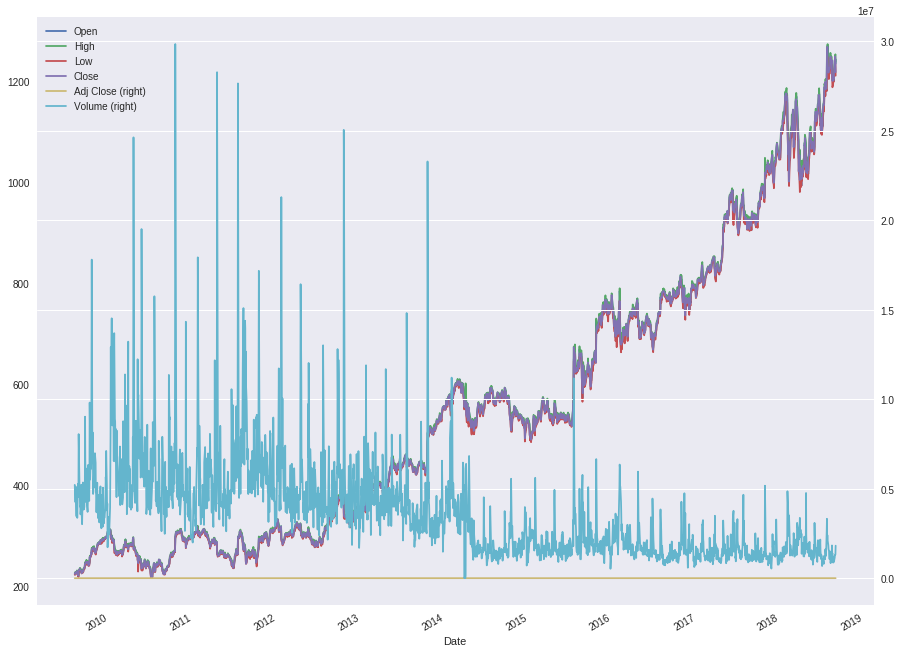

In [9]:
dfgoog.plot(grid = True, subplots = True, figsize=(15,12))
plt.legend(loc='best')

dfgoog.plot(secondary_y=['Adj Close', 'Volume'], figsize=(15,12))

The graph shows that the price changes of the stock for 10 years. The stock of google has been increased generally, however, from 2015 to 2016 and from 2017 to 2018, there are drops and increses.

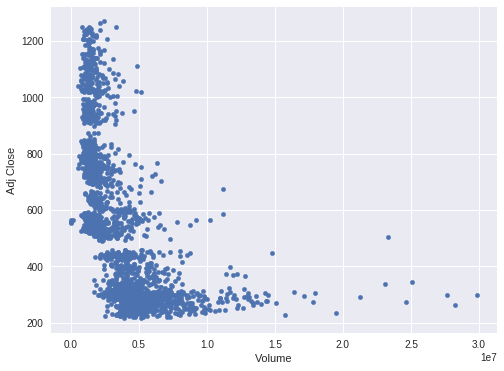

In [10]:
dfgoog.plot.scatter(x='Volume', y='Adj Close', figsize=(8,6))
plt.show()

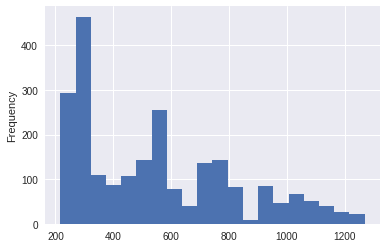

In [11]:
plt.clf()
dfgoog['Adj Close'].plot.hist(bins=20)
plt.show()

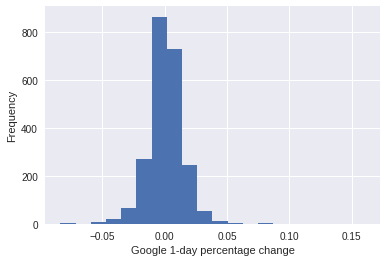

In [12]:
dfgoog['Adj Close'].pct_change().plot.hist(bins=20)
plt.xlabel('Google 1-day percentage change')
plt.show()

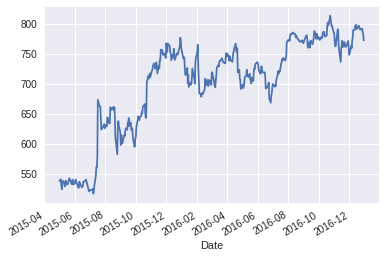

In [13]:
dfgoog['Adj Close']['2015-05':'2016-12'].plot()

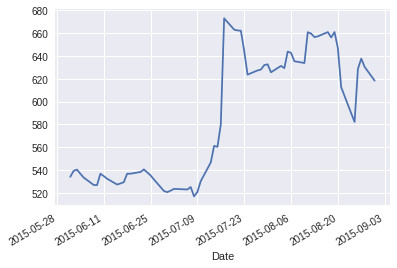

In [14]:
dfgoog['Adj Close']['2015-06':'2015-08'].plot()

## Add s&p 500 index for 10 years
Usually S&P 500 index has high realationship with stock market. So, I decided to add S&P 500 Adj Close price with Volume instead of using all data information.

In [0]:
sp_temp = pd.read_csv("/content/drive/My Drive/stock/SP.csv", 
                      index_col="Date",
                      parse_dates=True,
                      usecols=['Date','Adj Close','Volume'],
                      na_values=['nan'])
#rename 
sp_temp = sp_temp.rename(columns={'Adj Close':'sp500 Adj Close', 'Volume':'sp500 Volume'})
dfgoog = dfgoog.join(sp_temp)

In [16]:
dfgoog

Open         High          Low        Close    Adj Close  \
Date                                                                          
2009-08-03   222.920120   225.483444   222.373672   224.643906   224.643906   
2009-08-04   223.233078   225.533127   222.766129   225.399002   225.399002   
2009-08-05   226.526657   226.978729   222.492905   224.112366   224.112366   
2009-08-06   225.682159   225.970276   222.815796   223.724884   223.724884   
2009-08-07   226.362732   228.225616   226.024933   227.073105   227.073105   
2009-08-10   226.099442   227.723877   225.428802   226.829697   226.829697   
2009-08-11   225.369186   227.137695   224.728363   225.503311   225.503311   
2009-08-12   226.233566   229.383087   225.990158   227.808319   227.808319   
2009-08-13   229.581787   230.858490   227.972260   229.646378   229.646378   
2009-08-14   229.894760   230.093460   226.968781   228.513733   228.513733   
2009-08-17   224.291199   224.534622   220.128281   221.007553   221.007553   
2009-08-18   221.111877   222.403473   219.730865   221.201294   221.201294   
2009-08-19   218.573395   221.062210   217.863007   220.550537   220.550537   
2009-08-20   224.539581   229.596695   224.157074   228.717407   228.717407   
2009-08-21   231.265839   231.539063   229.830170   231.116806   231.116806   
2009-08-24   232.164993   233.526138   230.709457   232.850525   232.850525   
2009-08-25   233.049240   235.642380   232.845566   234.162003   234.162003   
2009-08-26   234.852509   234.971741   231.842087   232.487885   232.487885   
2009-08-27   232.776016   232.776016   228.876373   231.524155   231.524155   
2009-08-28   233.113815   234.658768   230.192810   230.873398   230.873398   
2009-08-31   228.409424   229.437729   227.520203   229.343338   229.343338   
2009-09-01   228.354767   231.901703   225.741760   226.407440   226.407440   
2009-09-02   226.437241   227.684128   224.832687   225.041321   225.041321   
2009-09-03   226.437241   227.644394   226.029892   227.281754   227.281754   
2009-09-04   227.306595   229.805344   226.417374   229.159531   229.159531   
2009-09-08   230.644882   231.986160   226.447174   227.828201   227.828201   
2009-09-09   228.046768   231.628479   227.917618   230.485916   230.485916   
2009-09-10   231.817245   233.948395   229.507278   233.948395   233.948395   
2009-09-11   233.680130   235.120773   232.304092   234.544510   234.544510   
2009-09-14   233.734787   236.859451   233.506271   236.024887   236.024887   
...                 ...          ...          ...          ...          ...   
2018-07-23  1181.010010  1206.489990  1181.000000  1205.500000  1205.500000   
2018-07-24  1262.589966  1266.000000  1235.560059  1248.079956  1248.079956   
2018-07-25  1239.130005  1265.859985  1239.130005  1263.699951  1263.699951   
2018-07-26  1251.000000  1269.770996  1249.020020  1268.329956  1268.329956   
2018-07-27  1271.000000  1273.890015  1231.000000  1238.500000  1238.500000   
2018-07-30  1228.010010  1234.916016  1211.469971  1219.739990  1219.739990   
2018-07-31  1220.010010  1227.588013  1205.599976  1217.260010  1217.260010   
2018-08-01  1228.000000  1233.469971  1210.209961  1220.010010  1220.010010   
2018-08-02  1205.900024  1229.880005  1204.790039  1226.150024  1226.150024   
2018-08-03  1229.619995  1230.000000  1215.060059  1223.709961  1223.709961   
2018-08-06  1225.000000  1226.088013  1215.796997  1224.770020  1224.770020   
2018-08-07  1237.000000  1251.170044  1236.170044  1242.219971  1242.219971   
2018-08-08  1240.469971  1256.500000  1238.008057  1245.609985  1245.609985   
2018-08-09  1249.900024  1255.541992  1246.010010  1249.099976  1249.099976   
2018-08-10  1243.000000  1245.694946  1232.000000  1237.609985  1237.609985   
2018-08-13  1236.979980  1249.272949  1233.640991  1235.010010  1235.010010   
2018-08-14  1235.189941  1245.869995  1225.109985  1242.099976  1242.099976   
2018-08-15  1229.260010  1235.239990  1209.510010  1214.380005  1214.

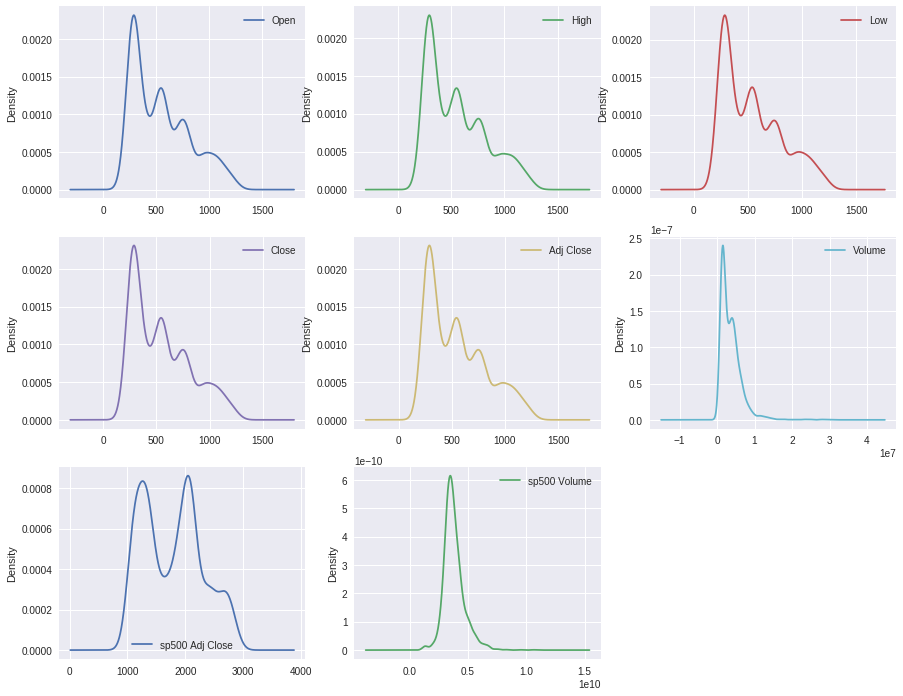

In [17]:
dfgoog.plot(kind='density', subplots=True, layout=(3,3), sharex=False,figsize=(15,12))
plt.show()

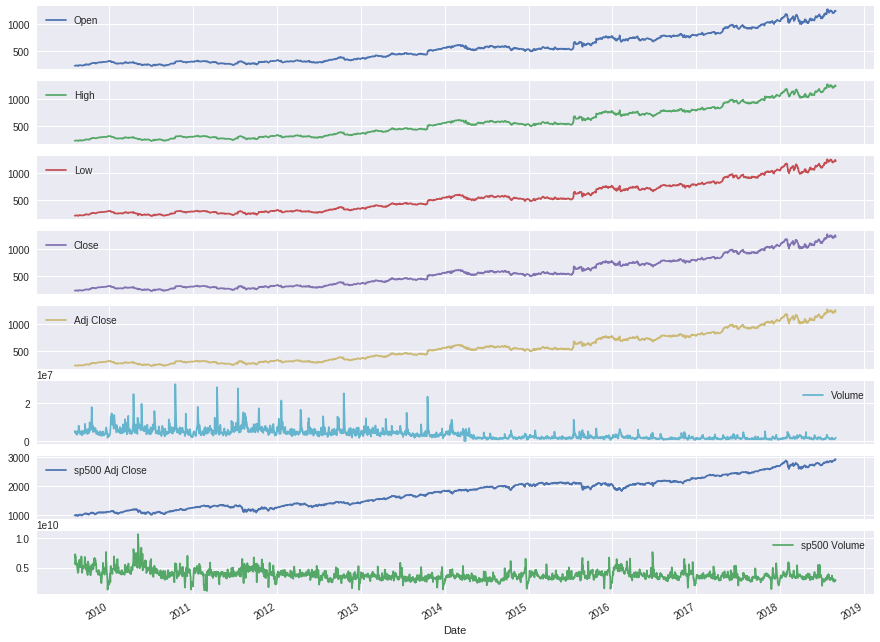

In [18]:
dfgoog.plot(grid = True, subplots = True, figsize=(15,12))
plt.legend(loc='best')

### Check the closing price of google stock and s&p 500 index for same periods.

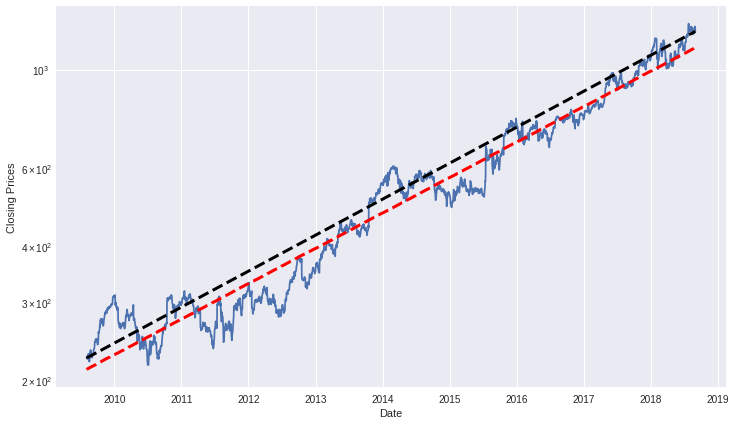

In [19]:
# Fit line to trend
x=np.arange(dfgoog.index.size)
fit = np.polyfit(x, np.log10(dfgoog['Adj Close'].values), 1)
linear_func = np.poly1d(fit)

# Get first and last values
time_values = [dfgoog.index[0], dfgoog.index[-1]]
y_values = [dfgoog['Adj Close'][0], dfgoog['Adj Close'][-1]]

# Plot log of google and trend lines
fig, ax = plt.subplots(1,1, figsize=(12,7))
ax.plot(dfgoog['Adj Close'])
ax.plot(time_values, y_values, 'k--', linewidth=3)
ax.plot(dfgoog.index, 10.**linear_func(x), 'r--', linewidth=3)
ax.set_yscale('log')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Prices')
ax.xaxis_date();

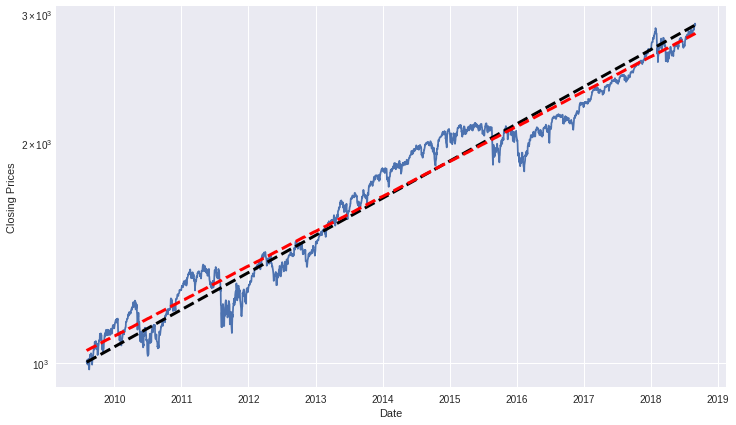

In [20]:
# Fit line to trend
x=np.arange(dfgoog.index.size)
fit = np.polyfit(x, np.log10(dfgoog['sp500 Adj Close'].values), 1)
linear_func = np.poly1d(fit)

# Get first and last values
time_values = [dfgoog.index[0], dfgoog.index[-1]]
y_values = [dfgoog['sp500 Adj Close'][0], dfgoog['sp500 Adj Close'][-1]]

# Plot log of sp 500 and trend lines
fig, ax = plt.subplots(1,1, figsize=(12,7))
ax.plot(dfgoog['sp500 Adj Close'])
ax.plot(time_values, y_values, 'k--', linewidth=3)
ax.plot(dfgoog.index, 10.**linear_func(x), 'r--', linewidth=3)
ax.set_yscale('log')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Prices')
ax.xaxis_date();

### Get more information about google stock and s&p 500 index for closing price.

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


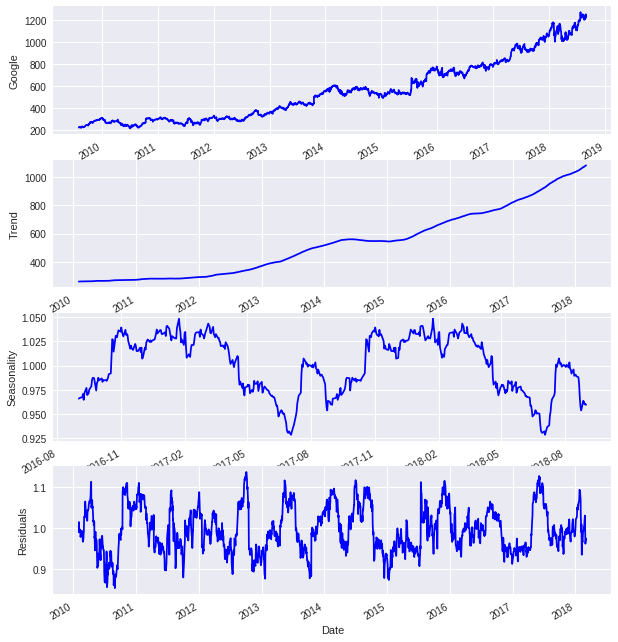

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomp = seasonal_decompose(dfgoog['Adj Close'], model='multiplicative', freq=252)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

# Plot data
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10,12))
dfgoog['Adj Close'].plot(ax=ax1, style='b')
trend.plot(ax=ax2, style='b')
seasonal[-504:].plot(ax=ax3, style='b')
residual.plot(ax=ax4, style='b')
ax1.set_ylabel('Google')
ax2.set_ylabel('Trend')
ax3.set_ylabel('Seasonality')
ax4.set_ylabel('Residuals');

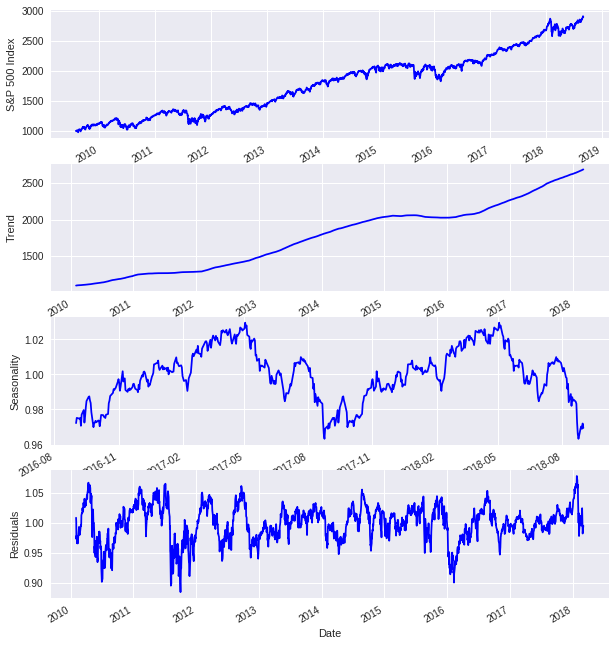

In [22]:
# Perform seasonal decomposition
decomp = seasonal_decompose(dfgoog['sp500 Adj Close'], model='multiplicative', freq=252)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

# Plot data
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10,12))
dfgoog['sp500 Adj Close'].plot(ax=ax1, style='b')
trend.plot(ax=ax2, style='b')
seasonal[-504:].plot(ax=ax3, style='b')
residual.plot(ax=ax4, style='b')
ax1.set_ylabel('S&P 500 Index')
ax2.set_ylabel('Trend')
ax3.set_ylabel('Seasonality')
ax4.set_ylabel('Residuals');

The stock of google and s&p 500 index price seemed to having simillar history in closing price.

## Add features for technical analysis

I

In [0]:
# Daily returns
## dfgoog['daily_returns'] = dfgoog['Adj Close'].copy()
## dfgoog['daily_returns'][1:] = (dfgoog['Adj Close'][1:]/dfgoog['Adj Close'][:-1].values)-1
## dfgoog['daily_returns'][0] = 0 #daiy returns for row 0 to 0

dfgoog['1d_fc'] = dfgoog['Adj Close'].shift(-1) # future close
dfgoog['1d_cfp'] = dfgoog['1d_fc'].pct_change(1) # close future pct
dfgoog['1d_cp'] = dfgoog['Adj Close'].pct_change(1) # close pct

In [0]:
# 5-day percentage changes for the current day, and 5 days in the future

dfgoog['5d_fc'] = dfgoog['Adj Close'].shift(-5) # future close
dfgoog['5d_cfp'] = dfgoog['5d_fc'].pct_change(5) # close future pct
dfgoog['5d_cp'] = dfgoog['Adj Close'].pct_change(5) # close pct

In [0]:
# 10-day percentage changes for the current day, and 10 days in the future

dfgoog['10d_fc'] = dfgoog['Adj Close'].shift(-10) # future close
dfgoog['10d_cfp'] = dfgoog['10d_fc'].pct_change(10) # close future pct
dfgoog['10d_cp'] = dfgoog['Adj Close'].pct_change(10) # close pct

In [27]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2018-10-23 19:36:55--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2018-10-23 19:36:56--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2018-10-23 19:36:56--  https://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.so

In [0]:

import talib
# Indicatior explanations: https://mrjbq7.github.io/ta-lib/func_groups/momentum_indicators.html

#features=['5d_cp']
# Create moving averages and rsi for timeperiods of 5, 10, 14, 30, 50, and 10
for n in [5, 10, 14, 30, 50, 100]:

        # Create the moving average indicator and divide by Adj_Close
        dfgoog['sma' + str(n)] = talib.SMA(dfgoog['Adj Close'].values, timeperiod=n) / dfgoog['Adj Close']
        dfgoog['wma' + str(n)] = talib.WMA(dfgoog['Adj Close'].values, timeperiod=n) / dfgoog['Adj Close']
        # Create the RSI indicator
        dfgoog['rsi' + str(n)] = talib.RSI(dfgoog['Adj Close'].values, timeperiod=n)
        
        #features = features+['sma' + str(n), 'wma' + str(n), 'rsi' + str(n)]
        
#print(features)


In [0]:
 # EMA- Momentum
dfgoog['EMA'] = talib.EMA(dfgoog['Close'].values, timeperiod = 30)
# Bollinger Bands
dfgoog['upperband'], dfgoog['middleband'], dfgoog['lowerband'] = talib.BBANDS(dfgoog['Close'].values, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
# StochK
dfgoog['slowk'], dfgoog['slowd'] = talib.STOCH(dfgoog['High'].values, dfgoog['Low'].values, dfgoog['Close'].values, fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3,
                         slowd_matype=0)
dfgoog['fastk'], dfgoog['fastd'] = talib.STOCHF(dfgoog['High'].values, dfgoog['Low'].values, dfgoog['Close'].values, 
                                                fastk_period = 14, fastd_period=3)


# MACD- Momentum
macd, macdsignal, dfgoog['macdhist'] = talib.MACD(dfgoog['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)

# CCI- Momentum
dfgoog['cci'] = talib.CCI(dfgoog['High'].values, dfgoog['Low'].values, dfgoog['Close'].values)

# William's R- Momentum
dfgoog['willr'] = talib.WILLR(dfgoog['High'].values, dfgoog['Low'].values, dfgoog['Close'].values, timeperiod=14)

# Chaikin A/D Oscillator
dfgoog['chaikin'] = talib.ADOSC(dfgoog['High'].values, dfgoog['Low'].values, dfgoog['Close'].values, dfgoog['Volume'].values.astype('float64'), fastperiod=3, slowperiod=10)


In [30]:
list(dfgoog)

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'sp500 Adj Close',
 'sp500 Volume',
 '1d_fc',
 '1d_cfp',
 '1d_cp',
 '5d_fc',
 '5d_cfp',
 '5d_cp',
 '10d_fc',
 '10d_cfp',
 '10d_cp',
 'sma5',
 'wma5',
 'rsi5',
 'sma10',
 'wma10',
 'rsi10',
 'sma14',
 'wma14',
 'rsi14',
 'sma30',
 'wma30',
 'rsi30',
 'sma50',
 'wma50',
 'rsi50',
 'sma100',
 'wma100',
 'rsi100',
 'EMA',
 'upperband',
 'middleband',
 'lowerband',
 'slowk',
 'slowd',
 'fastk',
 'fastd',
 'macdhist',
 'cci',
 'willr',
 'chaikin']

In [0]:
dfgoog = dfgoog.dropna()

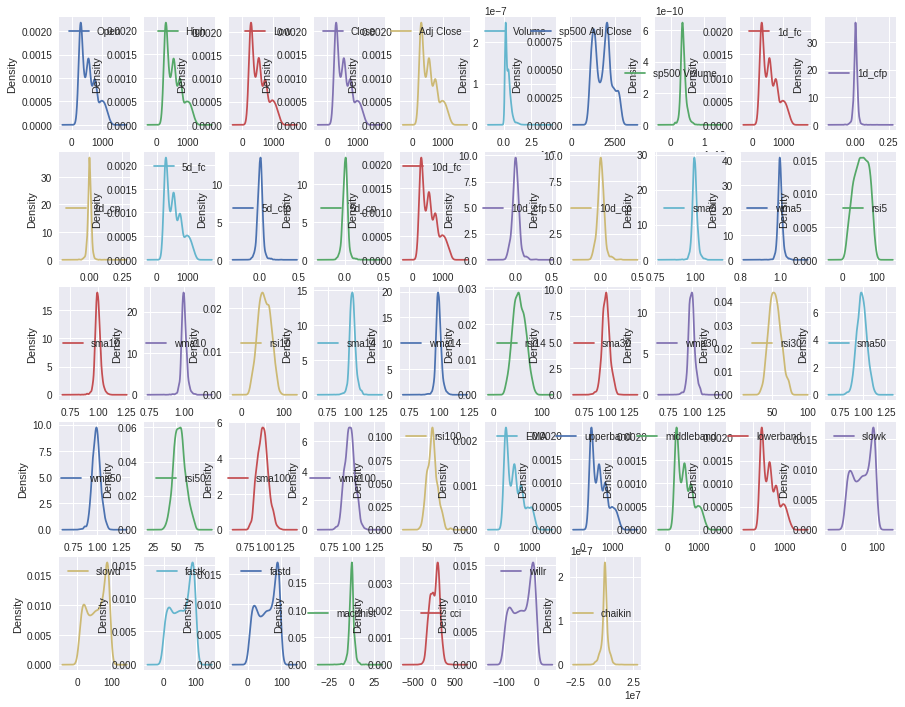

In [32]:
dfgoog.plot(kind='density', subplots=True, layout=(5,10), sharex=False,figsize=(15,12))
plt.show()

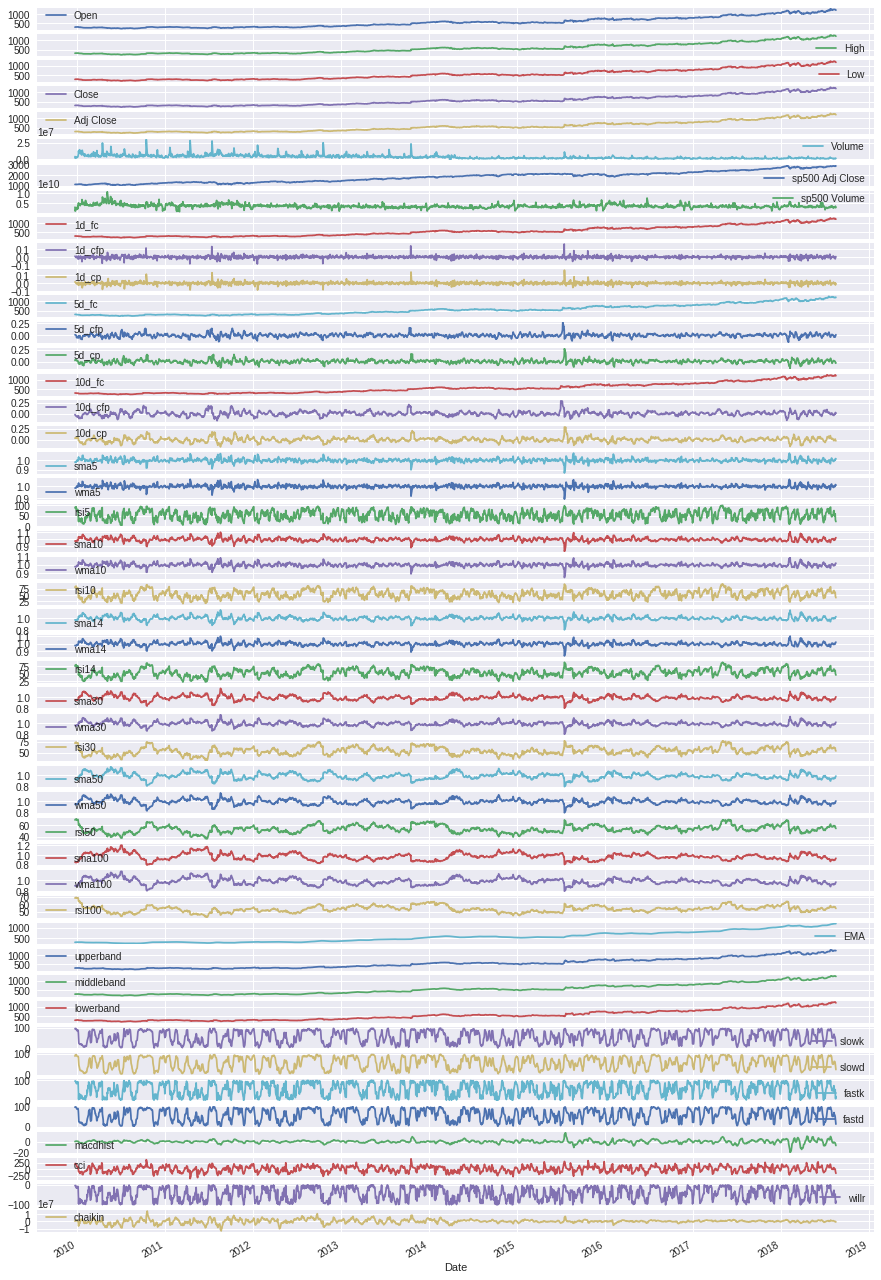

In [33]:
dfgoog.plot(grid = True, subplots = True, figsize=(15,25))
plt.legend(loc='best')

### Selecting Features
To get a better understaing of stock data, the below code will indicate the relevance of features.

In [56]:
# Feature Relevance
for col in list(dfgoog.columns.values):
    newdt = dfgoog.drop(col, axis=1)
    
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(newdt, dfgoog[col], test_size=0.25, random_state=42)

    # Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)

    # Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print("{} R^2 score: {:2f}".format(col ,score))
    


Open R^2 score: 0.999507
High R^2 score: 0.999641
Low R^2 score: 0.999694
Close R^2 score: 0.999943
Adj Close R^2 score: 0.999943
Volume R^2 score: 0.531226
sp500 Adj Close R^2 score: 0.992919
sp500 Volume R^2 score: 0.064508
1d_fc R^2 score: 0.998863
1d_cfp R^2 score: -0.958437
1d_cp R^2 score: 0.545442
5d_fc R^2 score: 0.997991
5d_cfp R^2 score: 0.128836
5d_cp R^2 score: 0.797936
10d_fc R^2 score: 0.997968
10d_cfp R^2 score: 0.106192
10d_cp R^2 score: 0.857465
sma5 R^2 score: 0.958077
wma5 R^2 score: 0.947826
rsi5 R^2 score: 0.952708
sma10 R^2 score: 0.981531
wma10 R^2 score: 0.978352
rsi10 R^2 score: 0.990891
sma14 R^2 score: 0.977611
wma14 R^2 score: 0.991720
rsi14 R^2 score: 0.992252
sma30 R^2 score: 0.976811
wma30 R^2 score: 0.981367
rsi30 R^2 score: 0.990177
sma50 R^2 score: 0.973188
wma50 R^2 score: 0.990507
rsi50 R^2 score: 0.989922
sma100 R^2 score: 0.968577
wma100 R^2 score: 0.988376
rsi100 R^2 score: 0.942502
EMA R^2 score: 0.998609
upperband R^2 score: 0.998970
middleband 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eba793d30>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

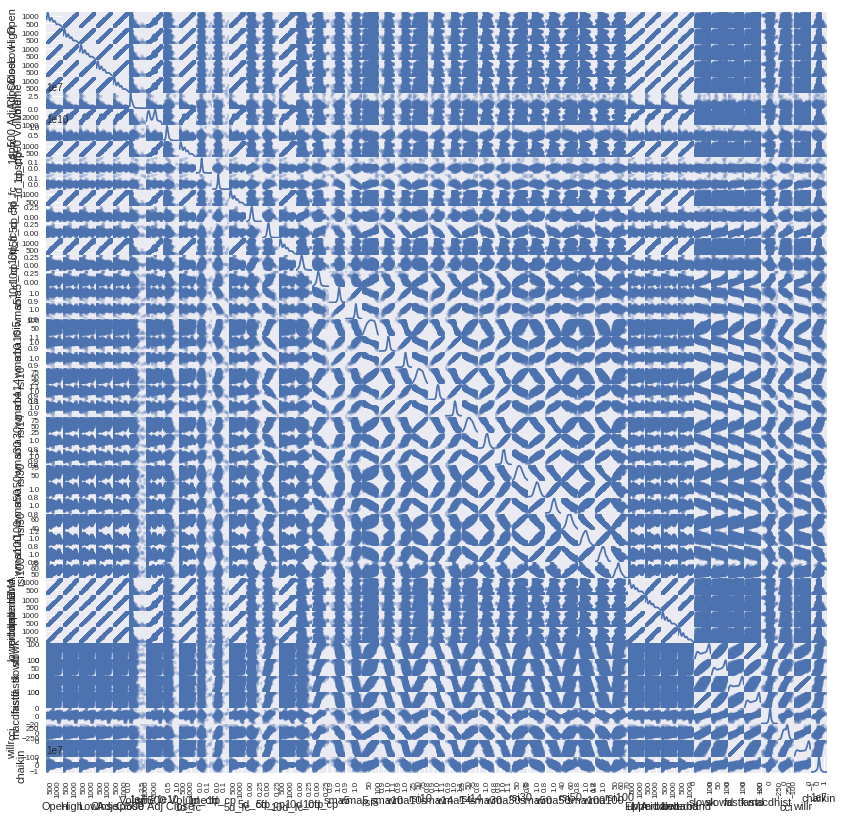

In [41]:
pd.scatter_matrix(dfgoog, alpha=0.3, figsize =(14,14), diagonal = 'kde')

In [0]:
feature_list=['1d_cp','5d_cp','10d_cp','1d_fc','5d_fc','10d_fc','rsi10','wma14','rsi14','rsi30',
              'wma50','EMA','upperband','middleband','lowerband',
              'slowk','fastk','fastd','willr']

In [0]:
features = dfgoog[feature_list]
targets = dfgoog['10d_cfp']
dffeatar=dfgoog[['10d_cfp'] + feature_list]

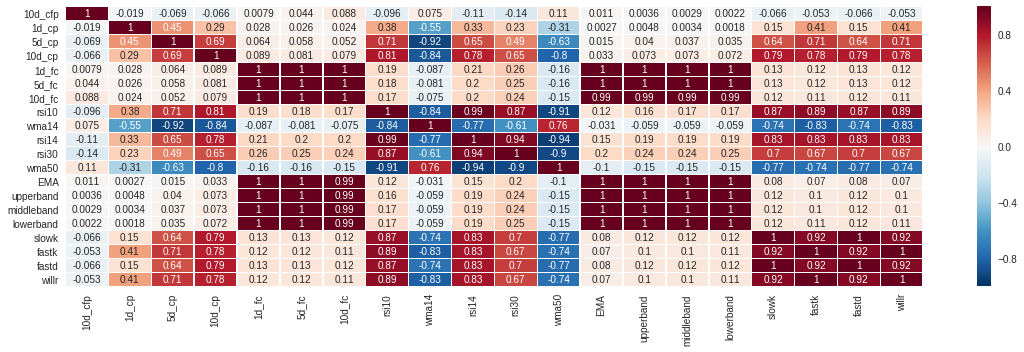

In [44]:
import seaborn as sns
corr = dffeatar.corr()
plt.figure(figsize=(16,5)) #size of table
sns.heatmap(corr, annot = True, linewidths=.5)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

In [0]:
train_size = int(0.75*targets.shape[0])

train_features = features[:train_size] #x_train
train_targets = targets[:train_size] #y_train
test_features = features[train_size:] #x_test
test_targets = targets[train_size:] #y_test

/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
R2 score for training set (Linear Regressor): 0.8517.
R2 score for test set (Linear Regressor): 0.6559.


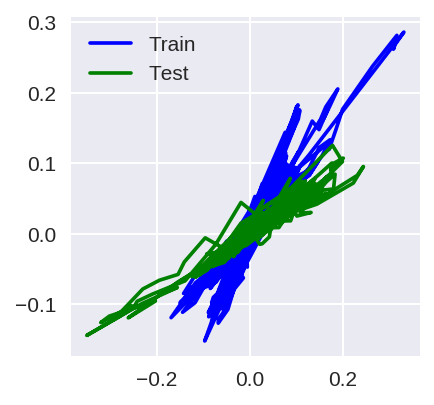

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import r2_score
from pprint import pprint

lr = LinearRegression()
parameters = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X':[True, False]}

grid = GridSearchCV(lr, parameters, cv=None)
grid.fit(train_features, train_targets)

predicttr = grid.predict(train_features)
predictte = grid.predict(test_features)

pprint (grid)
pprint(grid.best_params_)

print ("R2 score for training set (Linear Regressor): {:.4f}.".format(r2_score(predicttr, train_targets)))
print ("R2 score for test set (Linear Regressor): {:.4f}.".format(r2_score(predictte, test_targets)))

plt.figure(figsize=(3, 3), dpi=150)
plt.plot(predicttr, train_targets, color='blue', linestyle='solid', markerfacecolor='blue', markersize=3)
plt.plot(predictte,test_targets,color='green',linestyle='solid',markerfacecolor='green',markersize=3)
plt.legend(['Train','Test'],loc='upper left')
plt.show()


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'random_state': [10, 20, 45, 50, 100], 'max_depth': [3, 5, 10, 50, 80, 100, 200], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'random_state': 100}
R2 score for training set (Decision TreeRegressor): 0.8885.
R2 score for test set (Decision Tree Regressor): -6.0558.


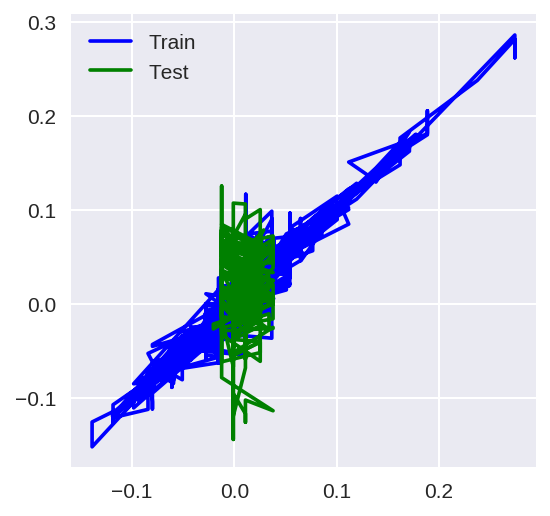

In [75]:
# Decision Tree

dt = DecisionTreeRegressor()
parameters = {
               'max_features':['auto', 'sqrt','log2'],
              'random_state':[10, 20, 45, 50, 100],
               'max_depth': [3, 5, 10, 50, 80, 100, 200],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf':[1, 2, 4]
               }

grid = GridSearchCV(dt, parameters, cv=None)
grid.fit(train_features, train_targets)

pprint (grid)
pprint(grid.best_params_)

predicttr = grid.predict(train_features)
predictte = grid.predict(test_features)


print ("R2 score for training set (Decision TreeRegressor): {:.4f}.".format(r2_score(predicttr, train_targets)))
print ("R2 score for test set (Decision Tree Regressor): {:.4f}.".format(r2_score(predictte, test_targets)))

plt.figure(figsize=(4, 4), dpi=150)
plt.plot(predicttr, train_targets, color='blue', linestyle='solid', markerfacecolor='blue', markersize=3)
plt.plot(predictte,test_targets,color='green',linestyle='solid',markerfacecolor='green',markersize=3)
plt.legend(['Train','Test'],loc='upper left')
plt.show()

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 200], 'max_depth': [3, 5, 10, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}
R2 score for training set (Random Forest Regressor): 0.8631.
R2 score for test set (Random Forest Regressor): -10.9161.


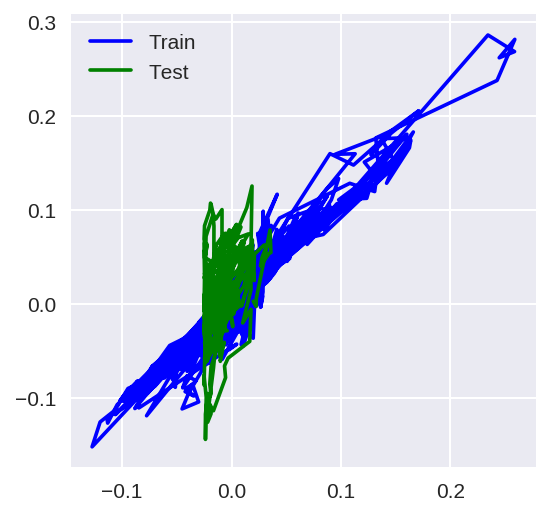

In [83]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
parameters = {'n_estimators': [10, 50, 100, 200],
               'max_depth': [3, 5, 10, 50],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf':[1, 2, 4]
               }

grid = GridSearchCV(rf, parameters, cv=None)
grid.fit(train_features, train_targets)

pprint (grid)
pprint(grid.best_params_)

predicttr = grid.predict(train_features)
predictte = grid.predict(test_features)


print ("R2 score for training set (Random Forest Regressor): {:.4f}.".format(r2_score(predicttr, train_targets)))
print ("R2 score for test set (Random Forest Regressor): {:.4f}.".format(r2_score(predictte, test_targets)))

plt.figure(figsize=(4, 4), dpi=150)
plt.plot(predicttr, train_targets, color='blue', linestyle='solid', markerfacecolor='blue', markersize=3)
plt.plot(predictte,test_targets,color='green',linestyle='solid',markerfacecolor='green',markersize=3)
plt.legend(['Train','Test'],loc='upper left')
plt.show()

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10], 'epsilon': [0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
{'C': 1, 'epsilon': 0.001}
R2 score for training set (Support Vector Regressor): 0.9996.
R2 score for test set (Support Vectort Regressor): -1329424029650418688.0000.


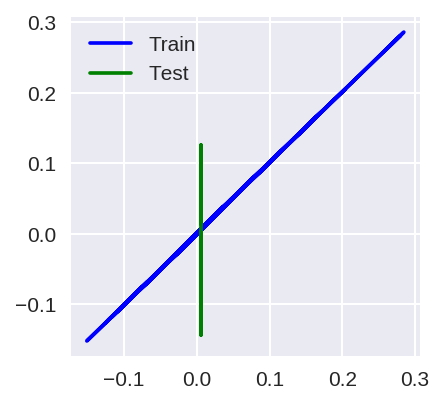

In [76]:
# svm
from sklearn import svm

svr = svm.SVR()

parameters = {'C': [1, 10], 'epsilon': [0.1, 1e-2, 1e-3]}

grid = GridSearchCV(svr, parameters, cv=None)
grid.fit(train_features, train_targets)

pprint (grid)
pprint(grid.best_params_)

predicttr = grid.predict(train_features)
predictte = grid.predict(test_features)


print ("R2 score for training set (Support Vector Regressor): {:.4f}.".format(r2_score(predicttr, train_targets)))
print ("R2 score for test set (Support Vectort Regressor): {:.4f}.".format(r2_score(predictte, test_targets)))

plt.figure(figsize=(3, 3), dpi=150)
plt.plot(predicttr, train_targets, color='blue', linestyle='solid', markerfacecolor='blue', markersize=3)
plt.plot(predictte,test_targets,color='green',linestyle='solid',markerfacecolor='green',markersize=3)
plt.legend(['Train','Test'],loc='upper left')
plt.show()

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [150, 200, 250, 300, 500], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
{'max_depth': 2, 'n_estimators': 500}
R2 score for training set (Gradient Boosting Regressor): 0.9696.
R2 score for test set (Gradient Boosting Regressor): -1.2243.


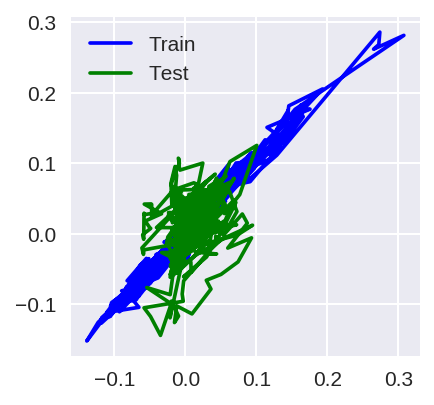

In [51]:
#
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

parameters = {'n_estimators' :[150, 200, 250, 300,500],
                'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
               }

grid = GridSearchCV(gbr, parameters, cv=None)
grid.fit(train_features, train_targets)

pprint (grid)
pprint(grid.best_params_)

predicttr = grid.predict(train_features)
predictte = grid.predict(test_features)


print ("R2 score for training set (Gradient Boosting Regressor): {:.4f}.".format(r2_score(predicttr, train_targets)))
print ("R2 score for test set (Gradient Boosting Regressor): {:.4f}.".format(r2_score(predictte, test_targets)))

plt.figure(figsize=(3, 3), dpi=150)
plt.plot(predicttr, train_targets, color='blue', linestyle='solid', markerfacecolor='blue', markersize=3)
plt.plot(predictte,test_targets,color='green',linestyle='solid',markerfacecolor='green',markersize=3)
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [63]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(train_targets)

print(utils.multiclass.type_of_target(train_targets))


continuous


In [64]:

print(utils.multiclass.type_of_target(train_targets.astype('int')))

print(utils.multiclass.type_of_target(encoded))


binary
multiclass


In [77]:
classifiers = [
    svm.SVC()
    ]



for item in classifiers:
    print(item)
    
    clf = item
    parameters = {'C': [1, 10], 
             'kernel':['rbf', 'linear','poly','sigmoid'],
                  'gamma':[1e-7, 1e-4,1e-2,0.0001],
                  'epsilon':[0.1,0.2,0.5,0.3]
             }

    grid = GridSearchCV(clf, parameters, cv=None)
    grid.fit(train_features, train_targets)

    pprint (grid)
    pprint(grid.best_params_)

    predicttr = grid.predict(train_features)
    predictte = grid.predict(test_features)


    print ("R2 score for training set (Support Vector Classification): {:.4f}.".format(r2_score(predicttr, train_targets)))
    print ("R2 score for test set (Support Vector Classification): {:.4f}.".format(r2_score(predictte, test_targets)))

    plt.figure(figsize=(3, 3), dpi=150)
    plt.plot(predicttr, train_targets, color='blue', linestyle='solid', markerfacecolor='blue', markersize=3)
    plt.plot(predictte,test_targets,color='green',linestyle='solid',markerfacecolor='green',markersize=3)
    plt.legend(['Train','Test'],loc='upper left')
    plt.show()

    

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


ValueError: ignored

In [132]:
import xgboost

classi = [
    xgboost.XGBClassifier(random_state=42)
    ]



for item in classi:
    print(item)
    
    xgb = item

    parameters = [{'n_estimators': [10, 50, 100]},
                 {'nthread':[4]}, #when use hyperthread, xgboost may become slower
              {'objective':['binary:logistic']},
              {'learning_rate': [0.05, 0.01, 0.001]}, #so called `eta` value
              {'max_depth': [1,2,3,4,5,6]},
              {'min_child_weight': [3,5,9,11]},
              {'silent': [1]},
              {'colsample_bytree': [0.7]}
              ]                  

    grid = GridSearchCV(xgb, parameters, cv = 3, n_jobs=5, scoring='roc_auc', verbose=2)

    grid.fit(train_features, train_targets)

    pprint (grid)
    pprint(grid.best_params_)

    predicttr = grid.predict(train_features)
    predictte = grid.predict(test_features)


    print ("R2 score for training set (XGB Classifier): {:.4f}.".format(r2_score(predicttr, train_targets)))
    print ("R2 score for test set (XGB Classifier): {:.4f}.".format(r2_score(predictte, test_targets)))

    plt.figure(figsize=(3, 3), dpi=150)
    plt.plot(predicttr, train_targets, color='blue', linestyle='solid', markerfacecolor='blue', markersize=3)
    plt.plot(predictte,test_targets,color='green',linestyle='solid',markerfacecolor='green',markersize=3)
    plt.legend(['Train','Test'],loc='upper left')
    plt.show()




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=10 .................................................
[CV] n_estimators=10 .................................................
[CV] n_estimators=50 .................................................
[CV] n_estimators=50 .................................................
[CV] n_estimators=10 .................................................
[CV] n_estimators=50 .................................................
[CV] n_estimators=100 ................................................


JoblibValueError: ignored

In [100]:
!wget https://pypi.python.org/packages/ad/26/4ea3bfaceb38ee37fc91748c48be3c4b19e4677a6a20f8c328f0a8ee41fa/mlxtend-0.11.0.tar.gz
!tar -xzvf mlxtend-0.11.0.tar.gz.tar.gz
%cd mlxtend
!./configure --prefix=/usr
!make
!make install
!pip install mlxtend

--2018-10-23 07:55:52--  https://pypi.python.org/packages/ad/26/4ea3bfaceb38ee37fc91748c48be3c4b19e4677a6a20f8c328f0a8ee41fa/mlxtend-0.11.0.tar.gz
Resolving pypi.python.org (pypi.python.org)... 151.101.0.223, 151.101.64.223, 151.101.128.223, ...
Connecting to pypi.python.org (pypi.python.org)|151.101.0.223|:443... connected.
HTTP request sent, awaiting response... 301 Redirect to Primary Domain
Location: https://pypi.org/packages/ad/26/4ea3bfaceb38ee37fc91748c48be3c4b19e4677a6a20f8c328f0a8ee41fa/mlxtend-0.11.0.tar.gz [following]
--2018-10-23 07:55:52--  https://pypi.org/packages/ad/26/4ea3bfaceb38ee37fc91748c48be3c4b19e4677a6a20f8c328f0a8ee41fa/mlxtend-0.11.0.tar.gz
Resolving pypi.org (pypi.org)... 151.101.64.223, 151.101.192.223, 151.101.128.223, ...
Connecting to pypi.org (pypi.org)|151.101.64.223|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.pythonhosted.org/packages/ad/26/4ea3bfaceb38ee37fc91748c48be3c4b19e4677a6a20f8c328f0

In [79]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
train_features_minmax = min_max_scaler.fit_transform(train_features)
train_features_minmax

array([[0.41482814, 0.38261691, 0.43540873, ..., 0.96467789, 0.96555368,
        0.96467789],
       [0.38842526, 0.42785295, 0.45171991, ..., 0.97300147, 0.98377357,
        0.97300147],
       [0.37197434, 0.43545634, 0.47270162, ..., 0.92907578, 0.96515915,
        0.92907578],
       ...,
       [0.29418126, 0.26145277, 0.28489068, ..., 0.19468003, 0.18444191,
        0.19468003],
       [0.23550943, 0.22762758, 0.25074145, ..., 0.06373002, 0.13961137,
        0.06373002],
       [0.35469598, 0.23810373, 0.27475569, ..., 0.10783864, 0.10157863,
        0.10783864]])

In [81]:
test_features_minmax = min_max_scaler.transform(test_features)
test_features_minmax

array([[0.35607794, 0.24619633, 0.28155341, ..., 0.16801241, 0.09236864,
        0.16801241],
       [0.35185997, 0.24930314, 0.25090403, ..., 0.21923692, 0.14607485,
        0.21923692],
       [0.3688014 , 0.29420826, 0.26382677, ..., 0.34955342, 0.22955401,
        0.34955342],
       ...,
       [0.25156848, 0.26129108, 0.33701168, ..., 0.13878393, 0.36053592,
        0.13878393],
       [0.31632455, 0.23860969, 0.31093278, ..., 0.07302956, 0.23471791,
        0.07302956],
       [0.32415751, 0.24989706, 0.30509306, ..., 0.18634587, 0.11259937,
        0.18634587]])

In [82]:
min_max_scaler.scale_

array([4.09333883e+00, 2.50886143e+00, 2.28376968e+00, 1.78579744e-03,
       1.78579744e-03, 1.78579744e-03, 1.31458465e-02, 3.72885404e+00,
       1.50235907e-02, 2.16722083e-02, 2.96823892e+00, 1.94894240e-03,
       1.77933651e-03, 1.83763288e-03, 1.84702693e-03, 1.03608674e-02,
       1.00000000e-02, 1.03608674e-02, 1.00000000e-02])

In [83]:
min_max_scaler.min_

array([ 0.34291961,  0.32419335,  0.34755064, -0.38685025, -0.38685025,
       -0.38685025, -0.21600269, -3.1062403 , -0.33468917, -0.682772  ,
       -2.38492503, -0.45645728, -0.39974796, -0.40299228, -0.38888902,
       -0.02490984,  0.        , -0.02490984,  1.        ])

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
R2 score for training set (Linear Regressor): 0.8517.
R2 score for test set (Linear Regressor): 0.6559.


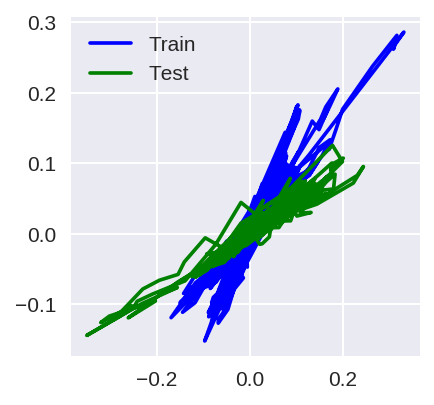

In [109]:
lr2 = LinearRegression()
parameters = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X':[True, False]}

grid = GridSearchCV(lr2, parameters, cv=None)
grid.fit(train_features_minmax, train_targets)

predicttr = grid.predict(train_features_minmax)
predictte = grid.predict(test_features_minmax)

pprint (grid)
pprint(grid.best_params_)

print ("R2 score for training set (Linear Regressor): {:.4f}.".format(r2_score(predicttr, train_targets)))
print ("R2 score for test set (Linear Regressor): {:.4f}.".format(r2_score(predictte, test_targets)))

plt.figure(figsize=(3, 3), dpi=150)
plt.plot(predicttr, train_targets, color='blue', linestyle='solid', markerfacecolor='blue', markersize=3)
plt.plot(predictte,test_targets,color='green',linestyle='solid',markerfacecolor='green',markersize=3)
plt.legend(['Train','Test'],loc='upper left')
plt.show()

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [150, 200, 250, 300, 500], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
{'max_depth': 2, 'n_estimators': 500}
R2 score for training set (Gradient Boosting Regressor): 0.9678.
R2 score for test set (Gradient Boosting Regressor): -1.2080.


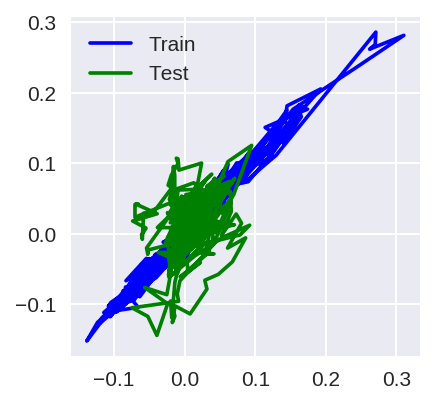

In [110]:

gbr2 = GradientBoostingRegressor()

parameters = {'n_estimators' :[150, 200, 250, 300,500],
                'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
               }

grid = GridSearchCV(gbr2, parameters, cv=None)
grid.fit(train_features_minmax, train_targets)

pprint (grid)
pprint(grid.best_params_)

predicttr = grid.predict(train_features_minmax)
predictte = grid.predict(test_features_minmax)


print ("R2 score for training set (Gradient Boosting Regressor): {:.4f}.".format(r2_score(predicttr, train_targets)))
print ("R2 score for test set (Gradient Boosting Regressor): {:.4f}.".format(r2_score(predictte, test_targets)))

plt.figure(figsize=(3, 3), dpi=150)
plt.plot(predicttr, train_targets, color='blue', linestyle='solid', markerfacecolor='blue', markersize=3)
plt.plot(predictte,test_targets,color='green',linestyle='solid',markerfacecolor='green',markersize=3)
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [85]:
train_features_normalized = preprocessing.normalize(train_features)
train_features_normalized

array([[ 2.13903103e-05,  2.83547436e-05,  4.68429029e-05, ...,
         1.17461813e-01,  1.16401010e-01, -4.30091688e-03],
       [ 1.34339900e-05,  4.99287034e-05,  5.51194364e-05, ...,
         1.17579316e-01,  1.17645739e-01, -3.26255307e-03],
       [ 8.57948497e-06,  5.36038770e-05,  6.62375274e-05, ...,
         1.12298328e-01,  1.15502530e-01, -8.57268259e-03],
       ...,
       [-6.34235625e-06, -1.33207723e-05, -1.46148818e-05, ...,
         1.03700043e-02,  1.07631157e-02, -4.28969082e-02],
       [-1.40773984e-05, -2.06491029e-05, -2.27414921e-05, ...,
         3.41899690e-03,  8.51883970e-03, -5.02291415e-02],
       [ 1.55145395e-06, -1.85045760e-05, -1.71891325e-05, ...,
         5.81539746e-03,  6.58354530e-03, -4.81114458e-02]])

In [86]:
test_features_normalized = preprocessing.normalize(test_features)
test_features_normalized

array([[ 1.73341280e-06, -1.67641035e-05, -1.55830492e-05, ...,
         9.05983643e-03,  6.10381294e-03, -4.48637787e-02],
       [ 1.17980697e-06, -1.61243356e-05, -2.28595559e-05, ...,
         1.18426023e-02,  8.91445040e-03, -4.21747703e-02],
       [ 3.42517095e-06, -6.47432251e-06, -1.98592403e-05, ...,
         1.89356057e-02,  1.33044102e-02, -3.52352431e-02],
       ...,
       [-6.87584691e-06, -7.72466413e-06, -1.42178971e-06, ...,
         4.27591586e-03,  1.14619139e-02, -2.65339623e-02],
       [-2.01204405e-06, -1.05640015e-05, -4.96540776e-06, ...,
         2.26158507e-03,  7.76013473e-03, -2.87064938e-02],
       [-1.42323799e-06, -9.19526606e-06, -5.77267020e-06, ...,
         5.78620231e-03,  4.12106542e-03, -2.52646725e-02]])

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
R2 score for training set (Linear Regressor): 0.9829.
R2 score for test set (Linear Regressor): 0.9479.


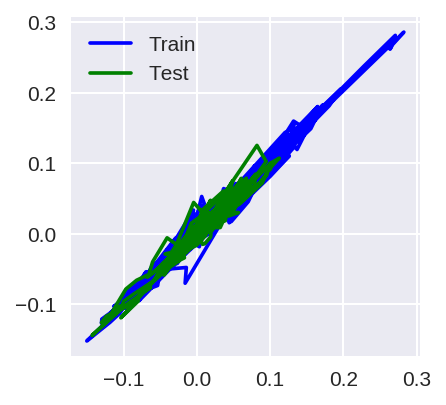

In [120]:
lr3 = LinearRegression()
parameters = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X':[True, False]}

grid = GridSearchCV(lr3, parameters, cv=None)
grid.fit(train_features_normalized, train_targets)

predicttr = grid.predict(train_features_normalized)
predictte = grid.predict(test_features_normalized)

pprint (grid)
pprint(grid.best_params_)

print ("R2 score for training set (Linear Regressor): {:.4f}.".format(r2_score(predicttr, train_targets)))
print ("R2 score for test set (Linear Regressor): {:.4f}.".format(r2_score(predictte, test_targets)))

plt.figure(figsize=(3, 3), dpi=150)
plt.plot(predicttr, train_targets, color='blue', linestyle='solid', markerfacecolor='blue', markersize=3)
plt.plot(predictte,test_targets,color='green',linestyle='solid',markerfacecolor='green',markersize=3)
plt.legend(['Train','Test'],loc='upper left')
plt.show()

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [150, 200, 250, 300, 500], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
{'max_depth': 3, 'n_estimators': 500}
R2 score for training set (Gradient Boosting Regressor): 0.9987.
R2 score for test set (Gradient Boosting Regressor): 0.9626.


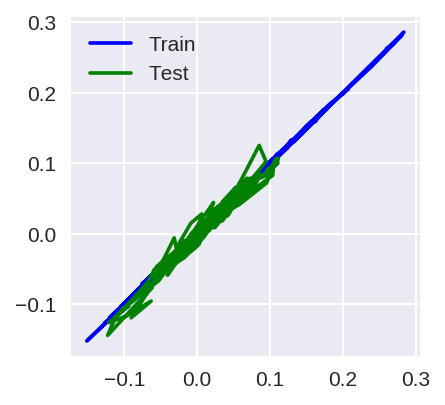

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

gbr3 = GradientBoostingRegressor()

parameters = {'n_estimators' :[150, 200, 250, 300,500],
                'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
               }

grid = GridSearchCV(gbr3, parameters, cv=None)
grid.fit(train_features_normalized, train_targets)

pprint (grid)
pprint(grid.best_params_)

predicttr = grid.predict(train_features_normalized)
predictte = grid.predict(test_features_normalized)


print ("R2 score for training set (Gradient Boosting Regressor): {:.4f}.".format(r2_score(predicttr, train_targets)))
print ("R2 score for test set (Gradient Boosting Regressor): {:.4f}.".format(r2_score(predictte, test_targets)))

plt.figure(figsize=(3, 3), dpi=150)
plt.plot(predicttr, train_targets, color='blue', linestyle='solid', markerfacecolor='blue', markersize=3)
plt.plot(predictte,test_targets,color='green',linestyle='solid',markerfacecolor='green',markersize=3)
plt.legend(['Train','Test'],loc='upper left')
plt.show()

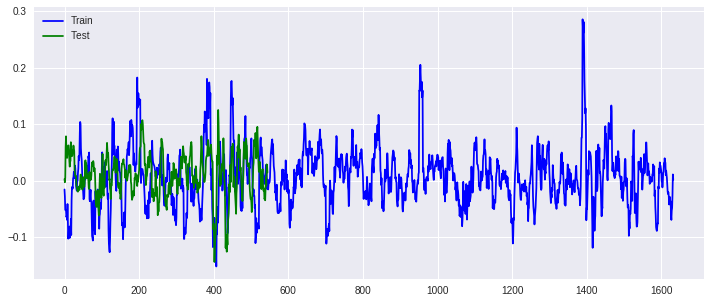

In [92]:
plt.figure(figsize = (12, 5))

plt.plot(np.arange(len(predicttr)), train_targets, color='blue', linestyle='solid', markerfacecolor='blue', markersize=3)
plt.plot(np.arange(len(predictte)),test_targets,color='green',linestyle='solid',markerfacecolor='green',markersize=3)
plt.legend(['Train','Test'],loc='upper left')
plt.show()

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'gamma': [1e-07, 0.0001, 0.01, 0.0001], 'epsilon': [0.1, 0.2, 0.5, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
{'C': 10, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}
R2 score for training set (Support Vector Classification): -0.9174.
R2 score for test set (Support Vector Classification): -4.3750.


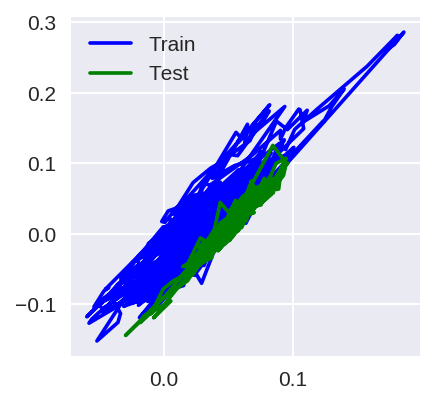

In [122]:
classifiers = [
    svm.SVR()
    ]



for item in classifiers:
    print(item)
    
    clf = item
    parameters = {'C': [1, 10], 
             'kernel':['rbf', 'linear','poly','sigmoid'],
                  'gamma':[1e-7, 1e-4,1e-2,0.0001],
                  'epsilon':[0.1,0.2,0.5,0.3]
             }

    grid = GridSearchCV(clf, parameters, cv=None)
    grid.fit(train_features_normalized, train_targets)

    pprint (grid)
    pprint(grid.best_params_)

    predicttr = grid.predict(train_features_normalized)
    predictte = grid.predict(test_features_normalized)


    print ("R2 score for training set (Support Vector Classification): {:.4f}.".format(r2_score(predicttr, train_targets)))
    print ("R2 score for test set (Support Vector Classification): {:.4f}.".format(r2_score(predictte, test_targets)))

    plt.figure(figsize=(3, 3), dpi=150)
    plt.plot(predicttr, train_targets, color='blue', linestyle='solid', markerfacecolor='blue', markersize=3)
    plt.plot(predictte,test_targets,color='green',linestyle='solid',markerfacecolor='green',markersize=3)
    plt.legend(['Train','Test'],loc='upper left')
    plt.show()

    

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 200], 'max_depth': [3, 5, 10, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}
R2 score for training set (Random Forest Regressor): 0.9958.
R2 score for test set (Random Forest Regressor): 0.9496.


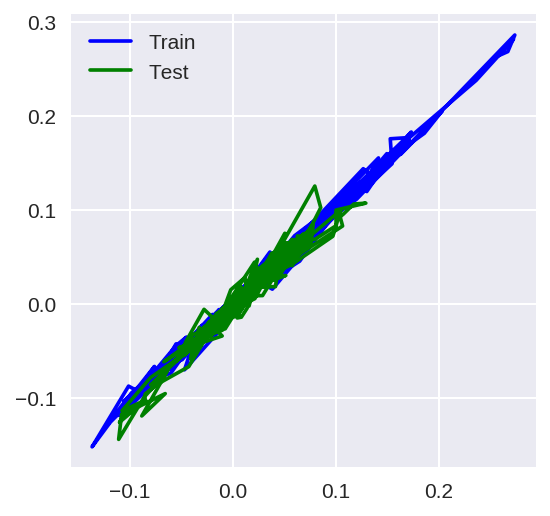

In [123]:
rf2 = RandomForestRegressor()
parameters = {'n_estimators': [10, 50, 100, 200],
               'max_depth': [3, 5, 10, 50],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf':[1, 2, 4]
               }

grid = GridSearchCV(rf2, parameters, cv=None)
grid.fit(train_features_normalized, train_targets)

pprint (grid)
pprint(grid.best_params_)

predicttr = grid.predict(train_features_normalized)
predictte = grid.predict(test_features_normalized)


print ("R2 score for training set (Random Forest Regressor): {:.4f}.".format(r2_score(predicttr, train_targets)))
print ("R2 score for test set (Random Forest Regressor): {:.4f}.".format(r2_score(predictte, test_targets)))

plt.figure(figsize=(4, 4), dpi=150)
plt.plot(predicttr, train_targets, color='blue', linestyle='solid', markerfacecolor='blue', markersize=3)
plt.plot(predictte,test_targets,color='green',linestyle='solid',markerfacecolor='green',markersize=3)
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [0]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)

ax1.plot(dfgoog.index, dfgoog['Adj Close'])
ax1.plot(dfgoog.index, dfgoog['sma100'])
ax2.bar(dfgoog.index, dfgoog['Volume'])

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

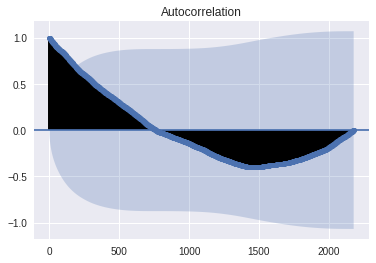

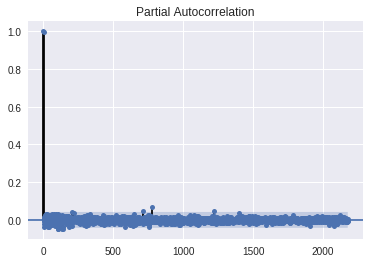

In [85]:
plot_acf(dfgoog['Adj Close'])
plot_pacf(dfgoog['Adj Close'])
plt.show()

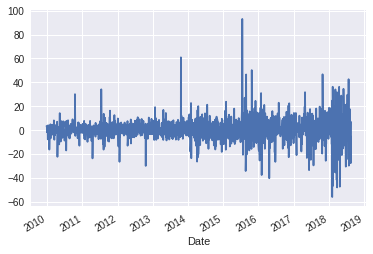

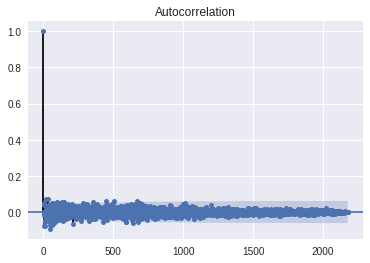

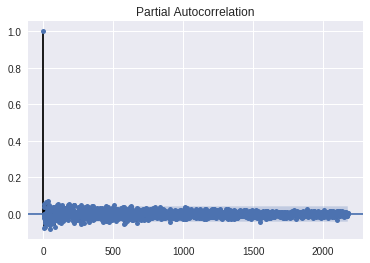

In [86]:
diff1 = dfgoog['Adj Close'].diff(periods = 1).iloc[1:]
diff1.plot()
plot_acf(diff1)
plot_pacf(diff1)
plt.show()

In [0]:
train = dfgoog['Adj Close'][:'2015']
test = dfgoog['Adj Close']['2016':]

In [88]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, order = (0,1,1))
model_fit = model.fit(trend='c', full_optput=True, disp=1)
print(model_fit.summary())

                           Statespace Model Results                           
Dep. Variable:              Adj Close   No. Observations:                 1516
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -5070.390
Date:                Tue, 23 Oct 2018   AIC                          10144.781
Time:                        05:17:08   BIC                          10155.428
Sample:                    12-23-2009   HQIC                         10148.745
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0398      0.017      2.281      0.023       0.006       0.074
sigma2        47.2619      0.484     97.593      0.000      46.313      48.211
Ljung-Box (Q):                       56.90   Jarque-

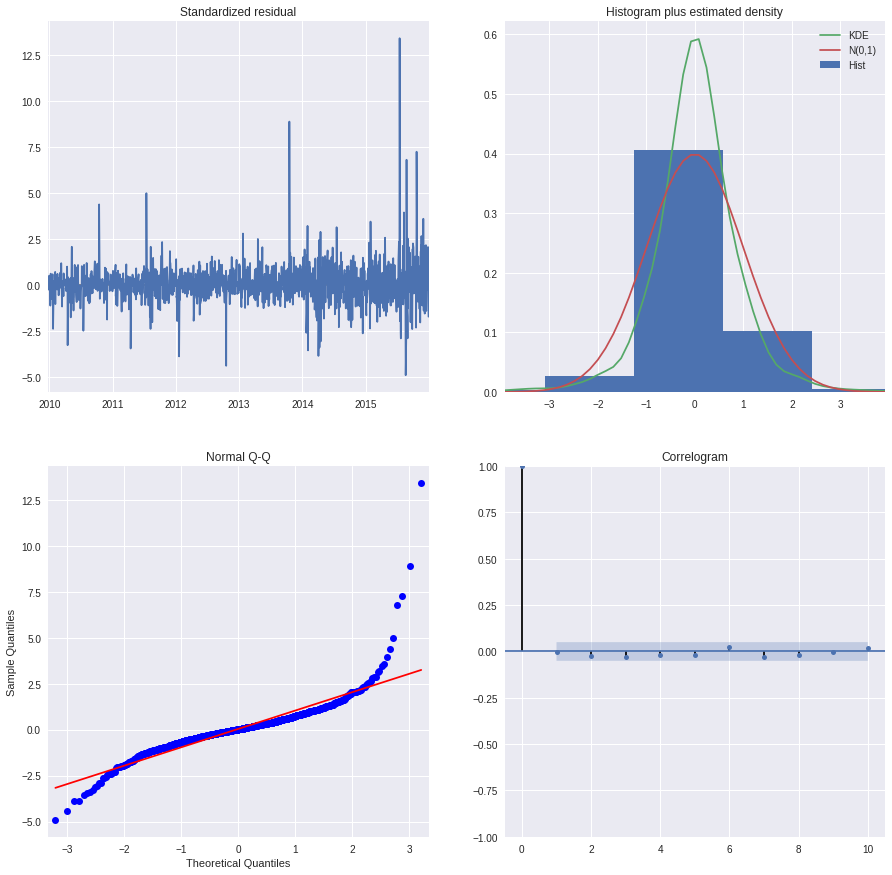

In [89]:

ax = model_fit.plot_diagnostics(figsize=(15,15))

In [0]:
preds = model_fit.get_prediction(int(test.index[0]),
                                int(test.index[-1]))
preds_confidence = predictions.conf_int()